<a href="https://www.kaggle.com/code/iamommpatel/indian-weather-predictor?scriptVersionId=168817529" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ml-olympiad-forecasting-indias-weather/NM Weather Data in India from 1901 to 2017 - Weather Data in India from 1901 to 2017.csv


# Importing Essentials !!

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msn
import plotly.express as pl
import plotly.io as pi
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error

Loading Dataset


In [3]:
df = pd.read_csv("/kaggle/input/ml-olympiad-forecasting-indias-weather/NM Weather Data in India from 1901 to 2017 - Weather Data in India from 1901 to 2017.csv")

In [4]:
#Printing 5 heads
df.head(5)

ID  YEAR      1      2      3      4      5      6      7      8      9  \
0   0  1901  17.99  19.43  23.49  26.41  28.28  28.60  27.49  26.98  26.26   
1   1  1902  19.00  20.39  24.10  26.54  28.68  28.44  27.29  27.05  25.95   
2   2  1903  18.32  19.79  22.46  26.03  27.93  28.41  28.04  26.63  26.34   
3   3  1904  17.77  19.39  22.95  26.73  27.83  27.85  26.84  26.73  25.84   
4   4  1905  17.40  17.79  21.78  24.84  28.32  28.69  27.67  27.47  26.29   

      10     11     12  
0  25.08  21.73  18.95  
1  24.37  21.33  18.78  
2  24.57  20.96  18.29  
3  24.36  21.07  18.84  
4  26.16  22.07  18.71

In [5]:
#printing 5 tails
df.tail(5)

ID  YEAR      1      2      3      4      5      6      7      8      9  \
112  112  2013  18.88  21.07  24.53  26.97  29.06  28.24  27.50  27.22  26.87   
113  113  2014  18.81  20.35  23.34  26.91  28.45  29.42  28.07  27.42  26.61   
114  114  2015  19.02  21.23  23.52  26.52  28.82  28.15  28.03  27.64  27.04   
115  115  2016  20.92  23.58  26.61  29.56  30.41  29.70  28.18  28.17  27.72   
116  116  2017  20.59  23.08  25.58  29.17  30.47  29.44  28.31  28.12  28.11   

        10     11     12  
112  25.63  22.18  19.69  
113  25.38  22.53  19.50  
114  25.82  22.95  20.21  
115  26.81  23.90  21.89  
116  27.24  23.92  21.47

In [6]:
df.shape

(117, 14)

In [7]:
df.describe() #basic statistical analysis

ID         YEAR           1           2           3  \
count  117.000000   117.000000  117.000000  117.000000  117.000000   
mean    58.000000  1959.000000   18.423248   20.137949   23.434188   
std     33.919021    33.919021    0.612963    0.900944    0.862825   
min      0.000000  1901.000000   17.250000   17.790000   21.780000   
25%     29.000000  1930.000000   18.070000   19.470000   22.840000   
50%     58.000000  1959.000000   18.350000   19.990000   23.330000   
75%     87.000000  1988.000000   18.720000   20.550000   23.930000   
max    116.000000  2017.000000   20.920000   23.580000   26.610000   

                4           5           6           7           8           9  \
count  117.000000  117.000000  117.000000  117.000000  117.000000  117.000000   
mean    26.514103   28.386410   28.300940   27.369231   26.940085   26.342650   
std      0.750740    0.644678    0.460603    0.345920    0.348876    0.387789   
min     24.840000   26.970000   27.330000   26.480000   26.210000   25.470000   
25%     26.000000   27.950000   28.020000   27.150000   26.730000   26.110000   
50%     26.540000   28.340000   28.250000   27.340000   26.900000   26.310000   
75%     26.910000   28.820000   28.580000   27.530000   27.150000   26.500000   
max     29.560000   30.780000   29.880000   28.470000   28.170000   28.110000   

               10          11          12  
count  117.000000  117.000000  117.000000  
mean    24.742051   21.765726   19.173333  
std      0.563152    0.634183    0.635912  
min     23.520000   20.590000   17.980000  
25%     24.390000   21.320000   18.780000  
50%     24.670000   21.720000   19.180000  
75%     24.920000   22.150000   19.550000  
max     27.240000   23.920000   21.890000

# Rapid Data Exploration using Pandas Profiling

In [8]:
pip install ydata-profiling

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 64.4 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
keras-nlp 0.8.2 requires keras-core, which is not installed.
tensorflow-decision-forests 1.8.1 requires wurlitzer, which is not installed.
apache-beam 2.46.0 requires dill<0.3.2,>=0.3.1.1, but you have dill 0.3.8 which is incompatible.
apache-beam 2.46.0 requires numpy<1.25.0,>=1.14.3, but you have numpy 1.25.2 which is incompatible.
apache-beam 2.46.0 requires pyarrow<10.0.0,>=3.0.0, but you have pyarrow 15.0.2 which is incompatible.
libpysal 4.9.2 requires packaging>=22, but you have packaging 21.3 which is incompatible.
libpysal 4.9.2 requires shapely>=2.0.1, but you have shapely 1.8.5

In [9]:
import ydata_profiling as ypf

profile = ypf.ProfileReport(df)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

The above profiling concludes that we have got a very simple, clean and balanced dataset without any null values. 

# **Performing EDA !!**

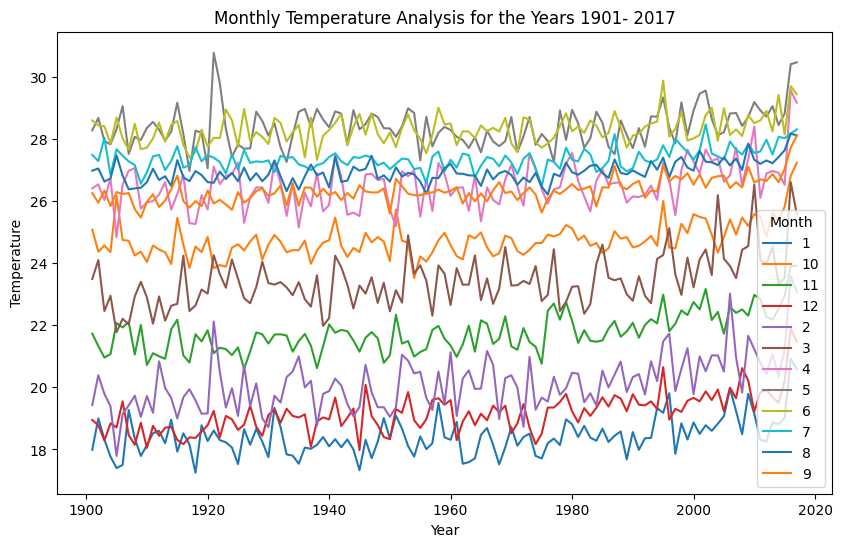

In [10]:
# Melt the month data (1,2,3...12) to single column month (column 1) and temperature (column 2) for each year
df_melt = df.melt(id_vars=["ID","YEAR"], var_name="Month", value_name="Temperature")


# Reshape to get month as column names
df_reshape = df_melt.pivot_table(
    values="Temperature", index="YEAR", columns="Month"
)

# Plot line chart
df_reshape.plot(kind="line", figsize=(10, 6))
plt.xlabel("Year")
plt.ylabel("Temperature")
plt.title("Monthly Temperature Analysis for the Years 1901- 2017")
plt.legend(title="Month")
plt.show()


Identifying sudden spikes in monthly temperature variations, potentially indicative of outliers influenced by factors such as global warming or natural disasters

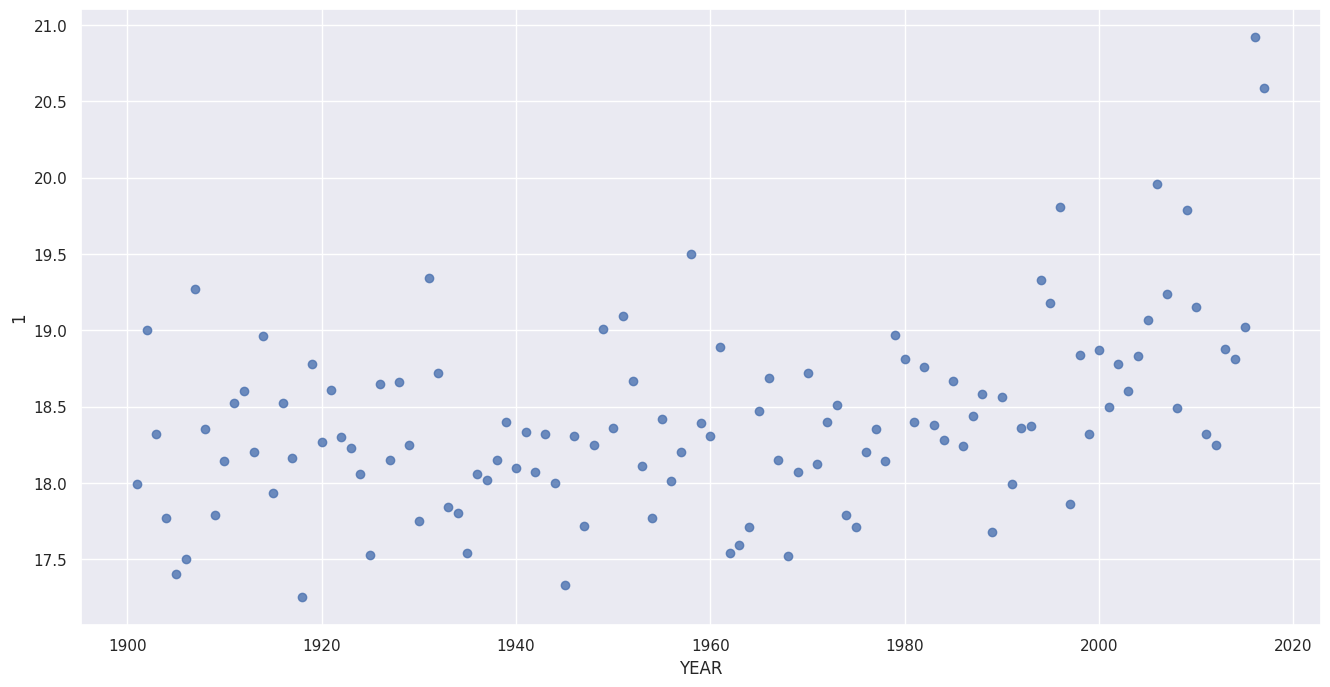

In [11]:
#Observing Increase in Temperature for January Month Throughout the years.
sns.set()
plt.figure(figsize=(16,8))
sns.regplot(x = "YEAR",y="1",fit_reg = False,data=df)
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

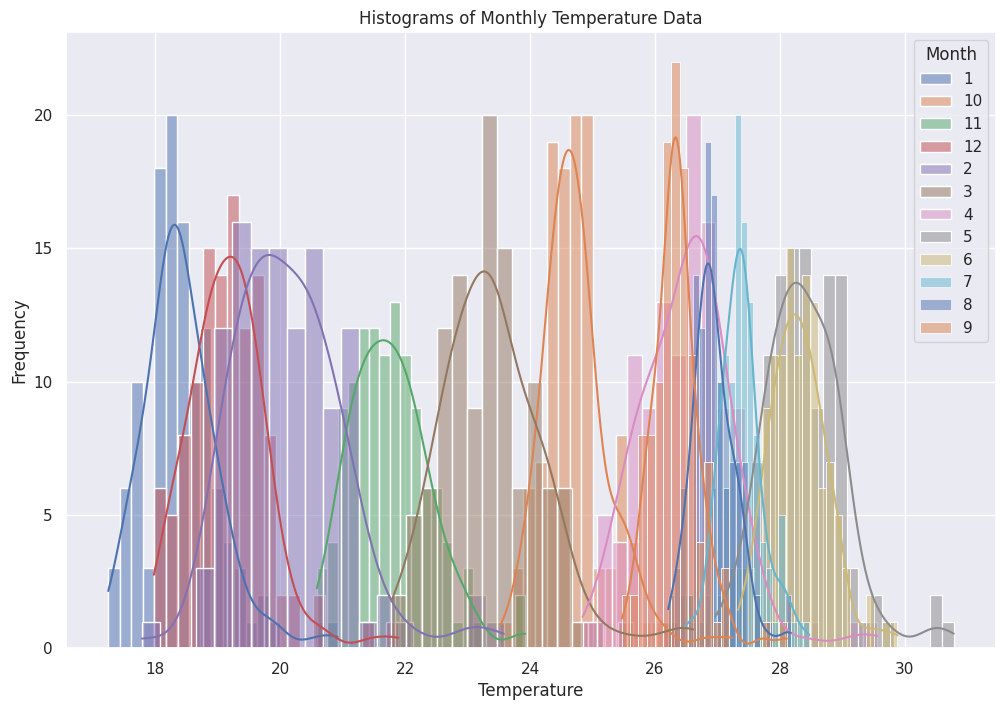

In [12]:
# Plot histograms for each month
plt.figure(figsize=(12, 8))
for column in df_reshape.columns:
    if column not in ['ID', 'YEAR']:
        sns.histplot(df_reshape[column], kde=True, label=column, bins=20)

plt.title('Histograms of Monthly Temperature Data')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.legend(title='Month')
plt.show()

The above histograms signifies our data having mostly normal distribution along with very few positively skewed distributions. 

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


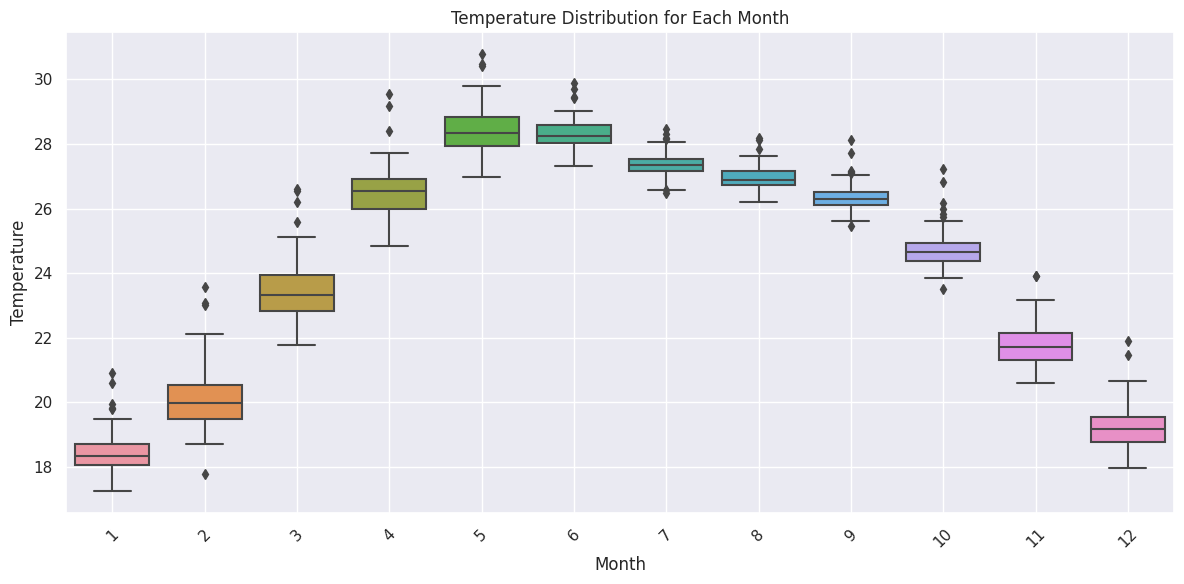

In [13]:
#ordering the month in sequential order
order = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12']
df_melt['Month'] = pd.Categorical(df_melt['Month'], categories=order, ordered=True)

# To check outliers and central tendency we create boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_melt, x='Month', y='Temperature')
plt.xlabel('Month')
plt.ylabel('Temperature')
plt.title('Temperature Distribution for Each Month')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


### Removing Outliers using Zscore Technique as we have normally distributed Data


In [14]:
def remove_outliers(df, threshold=4):
    #Working on copied dataframe to avoid any alterations in our actual dataframe
    df_cleaned = df.copy()
    
    for column in df_cleaned.columns:
        if column not in ['ID', 'YEAR']:  # Exclude non-temperature columns
            z_scores = np.abs((df_cleaned[column] - df_cleaned[column].mean()) / df_cleaned[column].std())
            df_cleaned[column] = df_cleaned[column][z_scores < threshold]
    
    return df_cleaned

# Example usage:
cleaned_df = remove_outliers(df)
cleaned_df


ID  YEAR      1      2      3      4      5      6      7      8      9  \
0      0  1901  17.99  19.43  23.49  26.41  28.28  28.60  27.49  26.98  26.26   
1      1  1902  19.00  20.39  24.10  26.54  28.68  28.44  27.29  27.05  25.95   
2      2  1903  18.32  19.79  22.46  26.03  27.93  28.41  28.04  26.63  26.34   
3      3  1904  17.77  19.39  22.95  26.73  27.83  27.85  26.84  26.73  25.84   
4      4  1905  17.40  17.79  21.78  24.84  28.32  28.69  27.67  27.47  26.29   
..   ...   ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
112  112  2013  18.88  21.07  24.53  26.97  29.06  28.24  27.50  27.22  26.87   
113  113  2014  18.81  20.35  23.34  26.91  28.45  29.42  28.07  27.42  26.61   
114  114  2015  19.02  21.23  23.52  26.52  28.82  28.15  28.03  27.64  27.04   
115  115  2016    NaN  23.58  26.61    NaN  30.41  29.70  28.18  28.17  27.72   
116  116  2017  20.59  23.08  25.58  29.17  30.47  29.44  28.31  28.12    NaN   

        10     11     12  
0    25.08  21.73  18.95  
1    24.37  21.33  18.78  
2    24.57  20.96  18.29  
3    24.36  21.07  18.84  
4    26.16  22.07  18.71  
..     ...    ...    ...  
112  25.63  22.18  19.69  
113  25.38  22.53  19.50  
114  25.82  22.95  20.21  
115  26.81  23.90    NaN  
116    NaN  23.92  21.47  

[117 rows x 14 columns]

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


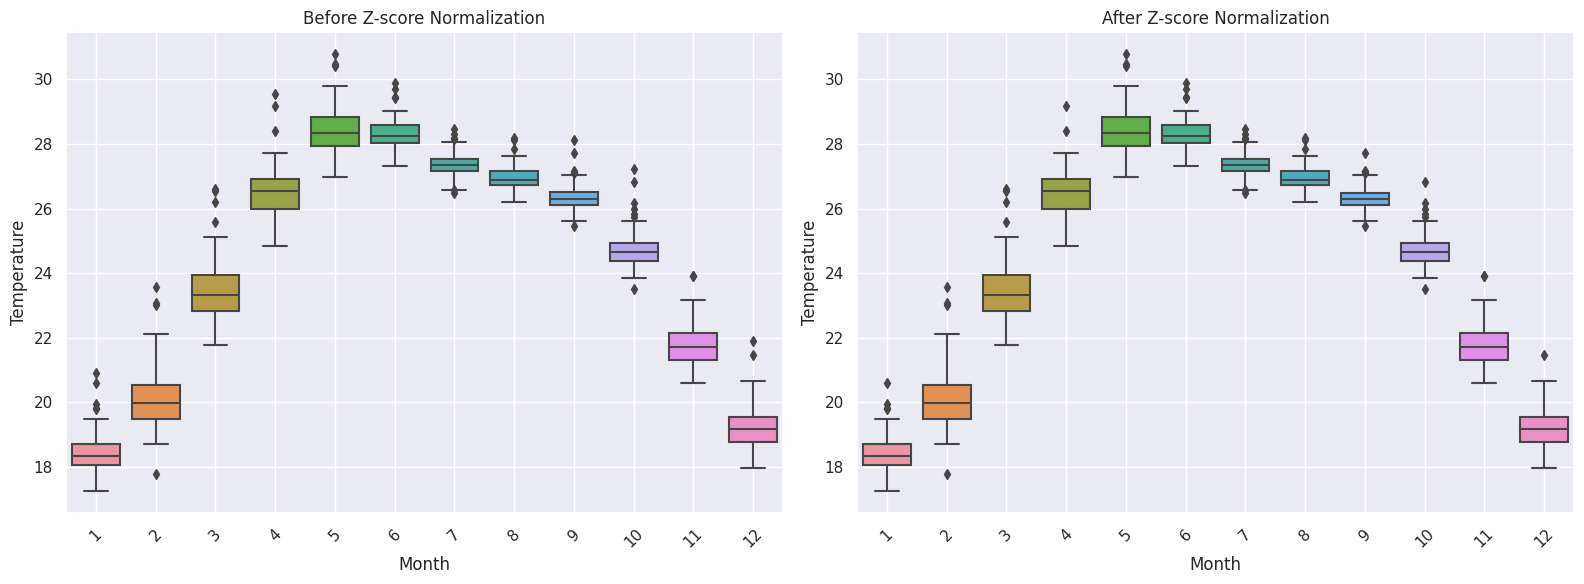

In [15]:
# ordering the month in sequential order
order = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12']
new_df_melt = cleaned_df.melt(id_vars=["ID","YEAR"], var_name="Month", value_name="Temperature")
new_df_melt['Month'] = pd.Categorical(new_df_melt['Month'], categories=order, ordered=True)

# Creating subplots for before and after Z-score normalization
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Before Z-score
sns.boxplot(data=df_melt, x='Month', y='Temperature', ax=axes[0])
axes[0].set_xlabel('Month')
axes[0].set_ylabel('Temperature')
axes[0].set_title('Before Z-score Normalization')
axes[0].set_xticklabels(order, rotation=45)
axes[0].grid(True)

# After Z-score
sns.boxplot(data=new_df_melt, x='Month', y='Temperature', ax=axes[1])
axes[1].set_xlabel('Month')
axes[1].set_ylabel('Temperature')
axes[1].set_title('After Z-score Normalization')
axes[1].set_xticklabels(order, rotation=45)
axes[1].grid(True)

plt.savefig('Outlier_comparison.png')
plt.tight_layout()
plt.show()


We does not want to remove much of the outliers as they are mostly occured in recent year due to climate change. so removing them would affect our model from predicting future temperatures

#   Models Training and Tesing

In [16]:
#copying cleaned (removed outliers) dataframe to full_df.
#this would be helpful to keep our code clean and get the full dataset back with nxt year's predicted value
full_df = cleaned_df.copy()
full_df

ID  YEAR      1      2      3      4      5      6      7      8      9  \
0      0  1901  17.99  19.43  23.49  26.41  28.28  28.60  27.49  26.98  26.26   
1      1  1902  19.00  20.39  24.10  26.54  28.68  28.44  27.29  27.05  25.95   
2      2  1903  18.32  19.79  22.46  26.03  27.93  28.41  28.04  26.63  26.34   
3      3  1904  17.77  19.39  22.95  26.73  27.83  27.85  26.84  26.73  25.84   
4      4  1905  17.40  17.79  21.78  24.84  28.32  28.69  27.67  27.47  26.29   
..   ...   ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
112  112  2013  18.88  21.07  24.53  26.97  29.06  28.24  27.50  27.22  26.87   
113  113  2014  18.81  20.35  23.34  26.91  28.45  29.42  28.07  27.42  26.61   
114  114  2015  19.02  21.23  23.52  26.52  28.82  28.15  28.03  27.64  27.04   
115  115  2016    NaN  23.58  26.61    NaN  30.41  29.70  28.18  28.17  27.72   
116  116  2017  20.59  23.08  25.58  29.17  30.47  29.44  28.31  28.12    NaN   

        10     11     12  
0    25.08  21.73  18.95  
1    24.37  21.33  18.78  
2    24.57  20.96  18.29  
3    24.36  21.07  18.84  
4    26.16  22.07  18.71  
..     ...    ...    ...  
112  25.63  22.18  19.69  
113  25.38  22.53  19.50  
114  25.82  22.95  20.21  
115  26.81  23.90    NaN  
116    NaN  23.92  21.47  

[117 rows x 14 columns]

In [17]:
#dropping ID and Year 
cleaned_df = cleaned_df.drop(['ID','YEAR'],axis=1)

In [18]:
cleaned_df

1      2      3      4      5      6      7      8      9     10  \
0    17.99  19.43  23.49  26.41  28.28  28.60  27.49  26.98  26.26  25.08   
1    19.00  20.39  24.10  26.54  28.68  28.44  27.29  27.05  25.95  24.37   
2    18.32  19.79  22.46  26.03  27.93  28.41  28.04  26.63  26.34  24.57   
3    17.77  19.39  22.95  26.73  27.83  27.85  26.84  26.73  25.84  24.36   
4    17.40  17.79  21.78  24.84  28.32  28.69  27.67  27.47  26.29  26.16   
..     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
112  18.88  21.07  24.53  26.97  29.06  28.24  27.50  27.22  26.87  25.63   
113  18.81  20.35  23.34  26.91  28.45  29.42  28.07  27.42  26.61  25.38   
114  19.02  21.23  23.52  26.52  28.82  28.15  28.03  27.64  27.04  25.82   
115    NaN  23.58  26.61    NaN  30.41  29.70  28.18  28.17  27.72  26.81   
116  20.59  23.08  25.58  29.17  30.47  29.44  28.31  28.12    NaN    NaN   

        11     12  
0    21.73  18.95  
1    21.33  18.78  
2    20.96  18.29  
3    21.07  18.84  
4    22.07  18.71  
..     ...    ...  
112  22.18  19.69  
113  22.53  19.50  
114  22.95  20.21  
115  23.90    NaN  
116  23.92  21.47  

[117 rows x 12 columns]

In [19]:
#filling 115th column using backward fill
cleaned_df = cleaned_df.fillna(method='bfill')
#Filling 116th column with median
cleaned_df = cleaned_df.fillna(cleaned_df.iloc[116].median())
cleaned_df


/tmp/ipykernel_18/2194735826.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  cleaned_df = cleaned_df.fillna(method='bfill')


1      2      3      4      5      6      7      8      9     10  \
0    17.99  19.43  23.49  26.41  28.28  28.60  27.49  26.98  26.26  25.08   
1    19.00  20.39  24.10  26.54  28.68  28.44  27.29  27.05  25.95  24.37   
2    18.32  19.79  22.46  26.03  27.93  28.41  28.04  26.63  26.34  24.57   
3    17.77  19.39  22.95  26.73  27.83  27.85  26.84  26.73  25.84  24.36   
4    17.40  17.79  21.78  24.84  28.32  28.69  27.67  27.47  26.29  26.16   
..     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
112  18.88  21.07  24.53  26.97  29.06  28.24  27.50  27.22  26.87  25.63   
113  18.81  20.35  23.34  26.91  28.45  29.42  28.07  27.42  26.61  25.38   
114  19.02  21.23  23.52  26.52  28.82  28.15  28.03  27.64  27.04  25.82   
115  20.59  23.58  26.61  29.17  30.41  29.70  28.18  28.17  27.72  26.81   
116  20.59  23.08  25.58  29.17  30.47  29.44  28.31  28.12  26.85  26.85   

        11     12  
0    21.73  18.95  
1    21.33  18.78  
2    20.96  18.29  
3    21.07  18.84  
4    22.07  18.71  
..     ...    ...  
112  22.18  19.69  
113  22.53  19.50  
114  22.95  20.21  
115  23.90  21.47  
116  23.92  21.47  

[117 rows x 12 columns]

In [20]:
# Transposing our dataframe before training and splitting
cleaned_df = cleaned_df.T
cleaned_df.shape
cleaned_df

0      1      2      3      4      5      6      7      8      9    ...  \
1   17.99  19.00  18.32  17.77  17.40  17.50  19.27  18.35  17.79  18.14  ...   
2   19.43  20.39  19.79  19.39  17.79  19.14  19.42  19.73  19.05  19.72  ...   
3   23.49  24.10  22.46  22.95  21.78  22.21  22.03  22.93  23.40  22.90  ...   
4   26.41  26.54  26.03  26.73  24.84  26.53  26.98  27.06  25.76  25.96  ...   
5   28.28  28.68  27.93  27.83  28.32  29.06  27.52  28.07  27.97  28.36  ...   
6   28.60  28.44  28.41  27.85  28.69  28.02  27.66  28.49  27.67  27.72  ...   
7   27.49  27.29  28.04  26.84  27.67  27.46  27.28  27.16  26.56  26.93  ...   
8   26.98  27.05  26.63  26.73  27.47  26.82  26.38  26.41  26.43  26.61  ...   
9   26.26  25.95  26.34  25.84  26.29  26.23  26.26  25.74  25.47  25.98  ...   
10  25.08  24.37  24.57  24.36  26.16  24.75  24.72  24.25  24.37  24.04  ...   
11  21.73  21.33  20.96  21.07  22.07  21.93  22.11  21.06  22.01  20.72  ...   
12  18.95  18.78  18.29  18.84  18.71  19.55  18.46  18.15  18.86  18.05  ...   

      107    108    109    110    111    112    113    114    115    116  
1   18.49  19.79  19.15  18.32  18.25  18.88  18.81  19.02  20.59  20.59  
2   19.83  21.66  21.23  20.79  20.43  21.07  20.35  21.23  23.58  23.08  
3   24.43  24.55  26.53  24.11  23.98  24.53  23.34  23.52  26.61  25.58  
4   26.54  27.35  28.40  26.10  26.89  26.97  26.91  26.52  29.17  29.17  
5   28.42  28.71  29.19  28.92  28.72  29.06  28.45  28.82  30.41  30.47  
6   28.10  28.77  28.51  28.60  28.91  28.24  29.42  28.15  29.70  29.44  
7   27.50  27.83  27.55  27.60  27.98  27.50  28.07  28.03  28.18  28.31  
8   27.00  27.85  27.33  27.20  27.31  27.22  27.42  27.64  28.17  28.12  
9   26.44  27.11  26.60  26.70  26.65  26.87  26.61  27.04  27.72  26.85  
10  25.47  25.20  25.58  25.51  24.85  25.63  25.38  25.82  26.81  26.85  
11  22.51  22.31  22.98  22.84  22.26  22.18  22.53  22.95  23.90  23.92  
12  20.62  20.22  19.22  19.84  19.91  19.69  19.50  20.21  21.47  21.47  

[12 rows x 117 columns]

In [21]:
#copying cleaned (transposed cleaned_df) dataframe to orig_df.
orig_df = cleaned_df.copy()
orig_df

0      1      2      3      4      5      6      7      8      9    ...  \
1   17.99  19.00  18.32  17.77  17.40  17.50  19.27  18.35  17.79  18.14  ...   
2   19.43  20.39  19.79  19.39  17.79  19.14  19.42  19.73  19.05  19.72  ...   
3   23.49  24.10  22.46  22.95  21.78  22.21  22.03  22.93  23.40  22.90  ...   
4   26.41  26.54  26.03  26.73  24.84  26.53  26.98  27.06  25.76  25.96  ...   
5   28.28  28.68  27.93  27.83  28.32  29.06  27.52  28.07  27.97  28.36  ...   
6   28.60  28.44  28.41  27.85  28.69  28.02  27.66  28.49  27.67  27.72  ...   
7   27.49  27.29  28.04  26.84  27.67  27.46  27.28  27.16  26.56  26.93  ...   
8   26.98  27.05  26.63  26.73  27.47  26.82  26.38  26.41  26.43  26.61  ...   
9   26.26  25.95  26.34  25.84  26.29  26.23  26.26  25.74  25.47  25.98  ...   
10  25.08  24.37  24.57  24.36  26.16  24.75  24.72  24.25  24.37  24.04  ...   
11  21.73  21.33  20.96  21.07  22.07  21.93  22.11  21.06  22.01  20.72  ...   
12  18.95  18.78  18.29  18.84  18.71  19.55  18.46  18.15  18.86  18.05  ...   

      107    108    109    110    111    112    113    114    115    116  
1   18.49  19.79  19.15  18.32  18.25  18.88  18.81  19.02  20.59  20.59  
2   19.83  21.66  21.23  20.79  20.43  21.07  20.35  21.23  23.58  23.08  
3   24.43  24.55  26.53  24.11  23.98  24.53  23.34  23.52  26.61  25.58  
4   26.54  27.35  28.40  26.10  26.89  26.97  26.91  26.52  29.17  29.17  
5   28.42  28.71  29.19  28.92  28.72  29.06  28.45  28.82  30.41  30.47  
6   28.10  28.77  28.51  28.60  28.91  28.24  29.42  28.15  29.70  29.44  
7   27.50  27.83  27.55  27.60  27.98  27.50  28.07  28.03  28.18  28.31  
8   27.00  27.85  27.33  27.20  27.31  27.22  27.42  27.64  28.17  28.12  
9   26.44  27.11  26.60  26.70  26.65  26.87  26.61  27.04  27.72  26.85  
10  25.47  25.20  25.58  25.51  24.85  25.63  25.38  25.82  26.81  26.85  
11  22.51  22.31  22.98  22.84  22.26  22.18  22.53  22.95  23.90  23.92  
12  20.62  20.22  19.22  19.84  19.91  19.69  19.50  20.21  21.47  21.47  

[12 rows x 117 columns]

In [22]:
cleaned_df.isnull().sum()

0      0
1      0
2      0
3      0
4      0
      ..
112    0
113    0
114    0
115    0
116    0
Length: 117, dtype: int64

We have to transpose the dataset.
As predicting next or future year's temperature be more accurate by using historical temperature data from the same months of previous years,


In [23]:
#Splitting X and y
X = cleaned_df.iloc[:, :116]
y = cleaned_df.iloc[:,116:]
print(X.shape,y.shape)
y

(12, 116) (12, 1)


116
1   20.59
2   23.08
3   25.58
4   29.17
5   30.47
6   29.44
7   28.31
8   28.12
9   26.85
10  26.85
11  23.92
12  21.47

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

As we can see by removing outliers , we have somewhat removed our last 2 year's data. Let's use different model and check how accurate they can predict y(test data).

# M1 : Linear Regression


In [25]:
#loading and training Linear Regression Model
m1 = LinearRegression()
m1.fit(X_train, y_train)
m1_y_pred = m1.predict(X_test)

In [26]:
mae = mean_absolute_error(y_test, m1_y_pred)
print('MAE: %.3f' % mae)
mse = mean_squared_error(y_test, m1_y_pred)
print("MSE = MEAN SQUARED ERROR =", mse)

MAE: 0.315
MSE = MEAN SQUARED ERROR = 0.15138666349385527


In [27]:
#Predicting 2018 to 2020 Values
forecast_lr = m1.predict(cleaned_df.iloc[:,1:118])
forecast_lr

array([[20.62635212],
       [21.94598023],
       [25.01031642],
       [27.76241707],
       [29.09411653],
       [29.07489261],
       [28.20201751],
       [27.88478704],
       [27.4405374 ],
       [26.15991594],
       [23.68015823],
       [21.07369399]])

In [28]:
# Transforming the linear regression predicted values to Dataframe
linear_reg = pd.DataFrame({'ID': range(0, 12),'Month' : range(1,13) })
linear_reg['Prediction'] = forecast_lr
linear_reg['Year'] = 2018
linear_reg

ID  Month  Prediction  Year
0    0      1   20.626352  2018
1    1      2   21.945980  2018
2    2      3   25.010316  2018
3    3      4   27.762417  2018
4    4      5   29.094117  2018
5    5      6   29.074893  2018
6    6      7   28.202018  2018
7    7      8   27.884787  2018
8    8      9   27.440537  2018
9    9     10   26.159916  2018
10  10     11   23.680158  2018
11  11     12   21.073694  2018

# M2: Decision Tree Regressor


In [29]:
#loading and training Decision Tree
m2 = DecisionTreeRegressor()
m2.fit(X_train, y_train)
m2_pred = m2.predict(X_test)
m2_y_pred = m2.predict(X_test)
m2_y_pred

array([25.58, 28.12, 20.59, 30.47])

In [30]:
#Predicting 2018 Values
forecast_dt = m2.predict(cleaned_df.iloc[:,1:118])
forecast_dt

array([21.47, 20.59, 25.58, 26.85, 30.47, 30.47, 28.12, 28.12, 29.17,
       25.58, 23.92, 21.47])

In [31]:
# Transforming the Decision Tree regression predicted values to Dataframe
DT_reg = pd.DataFrame({'ID': range(0, 12),'Month' : range(1,13) })
DT_reg['117'] = forecast_dt
DT_reg['Year'] = 2018
DT_reg

ID  Month    117  Year
0    0      1  21.47  2018
1    1      2  20.59  2018
2    2      3  25.58  2018
3    3      4  26.85  2018
4    4      5  30.47  2018
5    5      6  30.47  2018
6    6      7  28.12  2018
7    7      8  28.12  2018
8    8      9  29.17  2018
9    9     10  25.58  2018
10  10     11  23.92  2018
11  11     12  21.47  2018

# M3: XGboost Regressor

In [32]:
#loading and training XGboost Regressor
from xgboost import XGBRegressor
m3 = XGBRegressor()
m3.fit(X_train, y_train)
m3_y_pred = m3.predict(X_test)
m3_y_pred

array([25.579878, 29.70235 , 21.470076, 30.468925], dtype=float32)

In [33]:
#Predicting 2018 Values
forecast_xgb = m3.predict(cleaned_df.iloc[:, 1:118], validate_features=False)
forecast_xgb

array([21.470076, 21.470076, 25.579878, 29.168133, 30.468925, 30.468925,
       29.70235 , 28.123854, 25.5837  , 25.579878, 21.470076, 20.591194],
      dtype=float32)

In [34]:
# Transforming the XGboost regressor predicted values to Dataframe
xgb_reg = pd.DataFrame({'ID': range(0, 12),'Month' : range(1,13) })
xgb_reg['Prediction'] = forecast_xgb
xgb_reg['Year'] = 2018
xgb_reg

ID  Month  Prediction  Year
0    0      1   21.470076  2018
1    1      2   21.470076  2018
2    2      3   25.579878  2018
3    3      4   29.168133  2018
4    4      5   30.468925  2018
5    5      6   30.468925  2018
6    6      7   29.702351  2018
7    7      8   28.123854  2018
8    8      9   25.583700  2018
9    9     10   25.579878  2018
10  10     11   21.470076  2018
11  11     12   20.591194  2018

# M4: Gradient Boosting Regressor

In [35]:
#loading and training Gradient Boosting Regressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import  GridSearchCV

m4 = GradientBoostingRegressor()
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.5],
    'max_depth': [3, 5, 7]
}
gs = GridSearchCV(m4, param_grid, cv=5, scoring='r2')
gs.fit(X_train, y_train)
m4 = gs.best_estimator_
m4.fit(X_train, y_train)
m4_y_pred = m4.predict(X_test)

/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
 

In [36]:
m4_y_pred

array([25.95176006, 27.19856318, 24.33553798, 27.57824027])

In [37]:
#Predicting 2018 Values
forecast_gb = m4.predict(cleaned_df.iloc[:, 1:118])
forecast_gb

array([23.82933795, 24.26519011, 25.681543  , 26.51732128, 27.58097095,
       27.53929583, 27.02123421, 26.6592146 , 26.38295007, 25.99409326,
       25.11672068, 23.96391812])

In [38]:
# Transforming the Gradient Boosting regression predicted values to Dataframe
GB_reg = pd.DataFrame({'ID': range(0, 12),'Month' : range(1,13) })
GB_reg['117'] = forecast_gb
GB_reg['Year'] = 2018
GB_reg

ID  Month        117  Year
0    0      1  23.829338  2018
1    1      2  24.265190  2018
2    2      3  25.681543  2018
3    3      4  26.517321  2018
4    4      5  27.580971  2018
5    5      6  27.539296  2018
6    6      7  27.021234  2018
7    7      8  26.659215  2018
8    8      9  26.382950  2018
9    9     10  25.994093  2018
10  10     11  25.116721  2018
11  11     12  23.963918  2018

# Evaluating Model Performance

In [39]:
# converting values in dataframe to numpy
y_test = y_test.iloc[:, 0].to_numpy()
y_test

array([26.85, 28.31, 23.08, 29.44])

In [40]:
#flattening linear regression predicted values to match with y_test
m1_y_pred = m1_y_pred.flatten()
m2_y_pred = m2_y_pred.flatten()
m3_y_pred = m3_y_pred.flatten()
m4_y_pred = m4_y_pred.flatten()

print(y_test,"\n",m1_y_pred,"\n",m2_y_pred,"\n",m3_y_pred,"\n",m4_y_pred)

[26.85 28.31 23.08 29.44] 
 [26.30155206 28.23119219 22.54186965 29.34536085] 
 [25.58 28.12 20.59 30.47] 
 [25.579878 29.70235  21.470076 30.468925] 
 [25.95176006 27.19856318 24.33553798 27.57824027]


In [41]:

def evaluate_model_performance(y_test, predicted_values, X_test):
    # Calculate MSE
    mse = mean_squared_error(y_test, predicted_values)
    print("MSE = MEAN SQUARED ERROR =", mse)

    # Calculate RMSE
    rmse = np.sqrt(mean_squared_error(y_test, predicted_values))
    print("RMSE = ROOT MEAN SQUARED ERROR =", rmse)
    
    # Calculate MAE
    mae = mean_absolute_error(y_test, predicted_values)
    print("MAE = MEAN ABSOLUTE ERROR =", mae)

    # Calculate R^2 Score
    r2 = r2_score(y_test, predicted_values)
    print("r2 Score =", r2)
    
    # Calculate Adjusted R^2 Score
    n = len(y_test)
    p = X_test.shape[1]
    adjusted_r2 = 1 - ((1 - r2) * (n - 1) / (n - p - 1))
    print('adjusted r2 score =', adjusted_r2)

    # Flatten y_test and predicted_values if needed
    if len(y_test.shape) > 1:
        y_test = y_test.flatten()
    if len(predicted_values.shape) > 1:
        predicted_values = predicted_values.flatten()

    # Calculate residuals
    residuals = y_test - predicted_values

    # Plotting residuals
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=predicted_values, y=residuals, color='red')
    plt.axhline(color='red', linestyle='--')
    plt.title('Residuals vs. Predicted Values')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.show()

----------------------Linear Regression Evaluation--------------------------
MSE = MEAN SQUARED ERROR = 0.15138666349385527
RMSE = ROOT MEAN SQUARED ERROR = 0.3890843912236204
MAE = MEAN ABSOLUTE ERROR = 0.3150063113092445
r2 Score = 0.9737096056104102
adjusted r2 score = 1.00069797507229


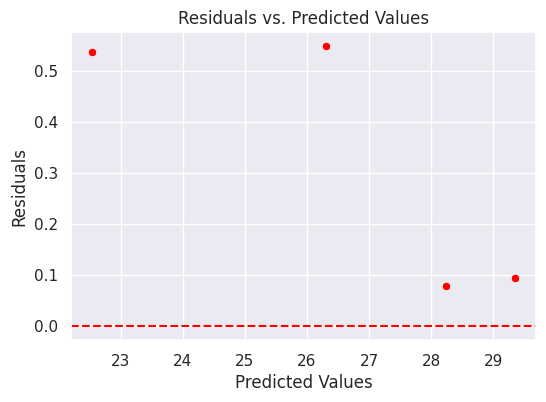




------------------Decision Tree Regression Evaluation----------------------
MSE = MEAN SQUARED ERROR = 2.2274999999999987
RMSE = ROOT MEAN SQUARED ERROR = 1.4924811556599296
MAE = MEAN ABSOLUTE ERROR = 1.2449999999999992
r2 Score = 0.6131637216168111
adjusted r2 score = 1.010269989691589


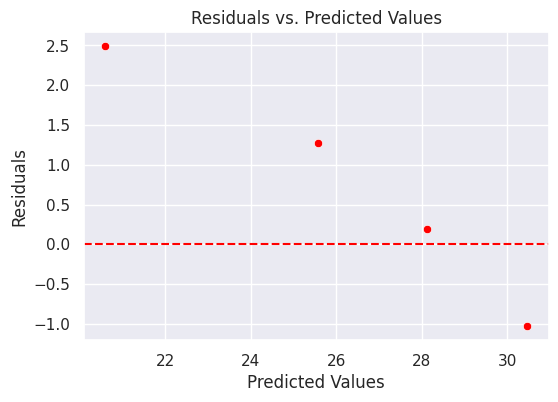




------------------XGboost Regression Evaluation----------------------
MSE = MEAN SQUARED ERROR = 1.8005986729921628
RMSE = ROOT MEAN SQUARED ERROR = 1.34186388020252
MAE = MEAN ABSOLUTE ERROR = 1.3253306579589843
r2 Score = 0.6873010596983178
adjusted r2 score = 1.0083017417779208


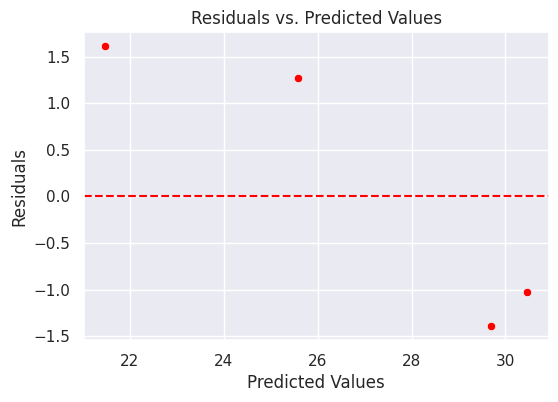




------------------Gradient Boosting Regression Evaluation----------------------
MSE = MEAN SQUARED ERROR = 1.7711629233359487
RMSE = ROOT MEAN SQUARED ERROR = 1.330850451153678
MAE = MEAN ABSOLUTE ERROR = 1.2817436168747944
r2 Score = 0.6924129860051322
adjusted r2 score = 1.0081660269202177


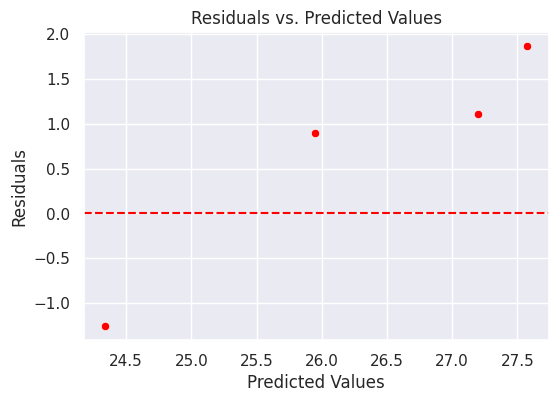

In [42]:
print("----------------------Linear Regression Evaluation--------------------------")
evaluate_model_performance( y_test, m1_y_pred, X_test)
print("\n\n\n------------------Decision Tree Regression Evaluation----------------------")
evaluate_model_performance( y_test, m2_y_pred, X_test)
print("\n\n\n------------------XGboost Regression Evaluation----------------------")
evaluate_model_performance( y_test, m3_y_pred, X_test)
print("\n\n\n------------------Gradient Boosting Regression Evaluation----------------------")
evaluate_model_performance( y_test, m4_y_pred, X_test)

This showcases both our Decision Tree Regressor and XGboost gives similar residual visualizations and they deviate too much from the actual values.

# **Submission**


### The above model evaluation clearly marks down Linear Regression model performs accurately than all the other models.

Adding 2018 predicted Values and YEAR to orig_df and transposing it to get our final dataset with predicted year

In [43]:
orig_df

0      1      2      3      4      5      6      7      8      9    ...  \
1   17.99  19.00  18.32  17.77  17.40  17.50  19.27  18.35  17.79  18.14  ...   
2   19.43  20.39  19.79  19.39  17.79  19.14  19.42  19.73  19.05  19.72  ...   
3   23.49  24.10  22.46  22.95  21.78  22.21  22.03  22.93  23.40  22.90  ...   
4   26.41  26.54  26.03  26.73  24.84  26.53  26.98  27.06  25.76  25.96  ...   
5   28.28  28.68  27.93  27.83  28.32  29.06  27.52  28.07  27.97  28.36  ...   
6   28.60  28.44  28.41  27.85  28.69  28.02  27.66  28.49  27.67  27.72  ...   
7   27.49  27.29  28.04  26.84  27.67  27.46  27.28  27.16  26.56  26.93  ...   
8   26.98  27.05  26.63  26.73  27.47  26.82  26.38  26.41  26.43  26.61  ...   
9   26.26  25.95  26.34  25.84  26.29  26.23  26.26  25.74  25.47  25.98  ...   
10  25.08  24.37  24.57  24.36  26.16  24.75  24.72  24.25  24.37  24.04  ...   
11  21.73  21.33  20.96  21.07  22.07  21.93  22.11  21.06  22.01  20.72  ...   
12  18.95  18.78  18.29  18.84  18.71  19.55  18.46  18.15  18.86  18.05  ...   

      107    108    109    110    111    112    113    114    115    116  
1   18.49  19.79  19.15  18.32  18.25  18.88  18.81  19.02  20.59  20.59  
2   19.83  21.66  21.23  20.79  20.43  21.07  20.35  21.23  23.58  23.08  
3   24.43  24.55  26.53  24.11  23.98  24.53  23.34  23.52  26.61  25.58  
4   26.54  27.35  28.40  26.10  26.89  26.97  26.91  26.52  29.17  29.17  
5   28.42  28.71  29.19  28.92  28.72  29.06  28.45  28.82  30.41  30.47  
6   28.10  28.77  28.51  28.60  28.91  28.24  29.42  28.15  29.70  29.44  
7   27.50  27.83  27.55  27.60  27.98  27.50  28.07  28.03  28.18  28.31  
8   27.00  27.85  27.33  27.20  27.31  27.22  27.42  27.64  28.17  28.12  
9   26.44  27.11  26.60  26.70  26.65  26.87  26.61  27.04  27.72  26.85  
10  25.47  25.20  25.58  25.51  24.85  25.63  25.38  25.82  26.81  26.85  
11  22.51  22.31  22.98  22.84  22.26  22.18  22.53  22.95  23.90  23.92  
12  20.62  20.22  19.22  19.84  19.91  19.69  19.50  20.21  21.47  21.47  

[12 rows x 117 columns]

In [44]:
orig_df['117'] = linear_reg['Prediction'].values.astype(float).round(2)
orig_df

0      1      2      3      4      5      6      7      8      9  ...  \
1   17.99  19.00  18.32  17.77  17.40  17.50  19.27  18.35  17.79  18.14  ...   
2   19.43  20.39  19.79  19.39  17.79  19.14  19.42  19.73  19.05  19.72  ...   
3   23.49  24.10  22.46  22.95  21.78  22.21  22.03  22.93  23.40  22.90  ...   
4   26.41  26.54  26.03  26.73  24.84  26.53  26.98  27.06  25.76  25.96  ...   
5   28.28  28.68  27.93  27.83  28.32  29.06  27.52  28.07  27.97  28.36  ...   
6   28.60  28.44  28.41  27.85  28.69  28.02  27.66  28.49  27.67  27.72  ...   
7   27.49  27.29  28.04  26.84  27.67  27.46  27.28  27.16  26.56  26.93  ...   
8   26.98  27.05  26.63  26.73  27.47  26.82  26.38  26.41  26.43  26.61  ...   
9   26.26  25.95  26.34  25.84  26.29  26.23  26.26  25.74  25.47  25.98  ...   
10  25.08  24.37  24.57  24.36  26.16  24.75  24.72  24.25  24.37  24.04  ...   
11  21.73  21.33  20.96  21.07  22.07  21.93  22.11  21.06  22.01  20.72  ...   
12  18.95  18.78  18.29  18.84  18.71  19.55  18.46  18.15  18.86  18.05  ...   

      108    109    110    111    112    113    114    115    116    117  
1   19.79  19.15  18.32  18.25  18.88  18.81  19.02  20.59  20.59  20.63  
2   21.66  21.23  20.79  20.43  21.07  20.35  21.23  23.58  23.08  21.95  
3   24.55  26.53  24.11  23.98  24.53  23.34  23.52  26.61  25.58  25.01  
4   27.35  28.40  26.10  26.89  26.97  26.91  26.52  29.17  29.17  27.76  
5   28.71  29.19  28.92  28.72  29.06  28.45  28.82  30.41  30.47  29.09  
6   28.77  28.51  28.60  28.91  28.24  29.42  28.15  29.70  29.44  29.07  
7   27.83  27.55  27.60  27.98  27.50  28.07  28.03  28.18  28.31  28.20  
8   27.85  27.33  27.20  27.31  27.22  27.42  27.64  28.17  28.12  27.88  
9   27.11  26.60  26.70  26.65  26.87  26.61  27.04  27.72  26.85  27.44  
10  25.20  25.58  25.51  24.85  25.63  25.38  25.82  26.81  26.85  26.16  
11  22.31  22.98  22.84  22.26  22.18  22.53  22.95  23.90  23.92  23.68  
12  20.22  19.22  19.84  19.91  19.69  19.50  20.21  21.47  21.47  21.07  

[12 rows x 118 columns]

In [45]:
full_df

ID  YEAR      1      2      3      4      5      6      7      8      9  \
0      0  1901  17.99  19.43  23.49  26.41  28.28  28.60  27.49  26.98  26.26   
1      1  1902  19.00  20.39  24.10  26.54  28.68  28.44  27.29  27.05  25.95   
2      2  1903  18.32  19.79  22.46  26.03  27.93  28.41  28.04  26.63  26.34   
3      3  1904  17.77  19.39  22.95  26.73  27.83  27.85  26.84  26.73  25.84   
4      4  1905  17.40  17.79  21.78  24.84  28.32  28.69  27.67  27.47  26.29   
..   ...   ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
112  112  2013  18.88  21.07  24.53  26.97  29.06  28.24  27.50  27.22  26.87   
113  113  2014  18.81  20.35  23.34  26.91  28.45  29.42  28.07  27.42  26.61   
114  114  2015  19.02  21.23  23.52  26.52  28.82  28.15  28.03  27.64  27.04   
115  115  2016    NaN  23.58  26.61    NaN  30.41  29.70  28.18  28.17  27.72   
116  116  2017  20.59  23.08  25.58  29.17  30.47  29.44  28.31  28.12    NaN   

        10     11     12  
0    25.08  21.73  18.95  
1    24.37  21.33  18.78  
2    24.57  20.96  18.29  
3    24.36  21.07  18.84  
4    26.16  22.07  18.71  
..     ...    ...    ...  
112  25.63  22.18  19.69  
113  25.38  22.53  19.50  
114  25.82  22.95  20.21  
115  26.81  23.90    NaN  
116    NaN  23.92  21.47  

[117 rows x 14 columns]

In [46]:
import pandas as pd
Year = pd.DataFrame(full_df['YEAR'].astype(str)).T
orig_df = pd.concat([orig_df,Year])
orig_df = orig_df.T
orig_df['YEAR'] = orig_df['YEAR'].fillna(2018)
orig_df

1      2      3      4      5      6      7      8      9     10  \
0    17.99  19.43  23.49  26.41  28.28   28.6  27.49  26.98  26.26  25.08   
1     19.0  20.39   24.1  26.54  28.68  28.44  27.29  27.05  25.95  24.37   
2    18.32  19.79  22.46  26.03  27.93  28.41  28.04  26.63  26.34  24.57   
3    17.77  19.39  22.95  26.73  27.83  27.85  26.84  26.73  25.84  24.36   
4     17.4  17.79  21.78  24.84  28.32  28.69  27.67  27.47  26.29  26.16   
..     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
113  18.81  20.35  23.34  26.91  28.45  29.42  28.07  27.42  26.61  25.38   
114  19.02  21.23  23.52  26.52  28.82  28.15  28.03  27.64  27.04  25.82   
115  20.59  23.58  26.61  29.17  30.41   29.7  28.18  28.17  27.72  26.81   
116  20.59  23.08  25.58  29.17  30.47  29.44  28.31  28.12  26.85  26.85   
117  20.63  21.95  25.01  27.76  29.09  29.07   28.2  27.88  27.44  26.16   

        11     12  YEAR  
0    21.73  18.95  1901  
1    21.33  18.78  1902  
2    20.96  18.29  1903  
3    21.07  18.84  1904  
4    22.07  18.71  1905  
..     ...    ...   ...  
113  22.53   19.5  2014  
114  22.95  20.21  2015  
115   23.9  21.47  2016  
116  23.92  21.47  2017  
117  23.68  21.07  2018  

[118 rows x 13 columns]

In [47]:
# orig_df.reset_index('YEAR',inplace=False)
# orig_df
predicted_df = orig_df.loc[:,['YEAR','1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',]]
predicted_df

YEAR      1      2      3      4      5      6      7      8      9  \
0    1901  17.99  19.43  23.49  26.41  28.28   28.6  27.49  26.98  26.26   
1    1902   19.0  20.39   24.1  26.54  28.68  28.44  27.29  27.05  25.95   
2    1903  18.32  19.79  22.46  26.03  27.93  28.41  28.04  26.63  26.34   
3    1904  17.77  19.39  22.95  26.73  27.83  27.85  26.84  26.73  25.84   
4    1905   17.4  17.79  21.78  24.84  28.32  28.69  27.67  27.47  26.29   
..    ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
113  2014  18.81  20.35  23.34  26.91  28.45  29.42  28.07  27.42  26.61   
114  2015  19.02  21.23  23.52  26.52  28.82  28.15  28.03  27.64  27.04   
115  2016  20.59  23.58  26.61  29.17  30.41   29.7  28.18  28.17  27.72   
116  2017  20.59  23.08  25.58  29.17  30.47  29.44  28.31  28.12  26.85   
117  2018  20.63  21.95  25.01  27.76  29.09  29.07   28.2  27.88  27.44   

        10     11     12  
0    25.08  21.73  18.95  
1    24.37  21.33  18.78  
2    24.57  20.96  18.29  
3    24.36  21.07  18.84  
4    26.16  22.07  18.71  
..     ...    ...    ...  
113  25.38  22.53   19.5  
114  25.82  22.95  20.21  
115  26.81   23.9  21.47  
116  26.85  23.92  21.47  
117  26.16  23.68  21.07  

[118 rows x 13 columns]

### Submission File

In [48]:
linear_reg.to_csv('predictions.csv', index=False)

In [49]:
predictions_df = pd.read_csv('predictions.csv')
#Displaying the prediction Dataframe
print(predictions_df)

    ID  Month  Prediction  Year
0    0      1   20.626352  2018
1    1      2   21.945980  2018
2    2      3   25.010316  2018
3    3      4   27.762417  2018
4    4      5   29.094117  2018
5    5      6   29.074893  2018
6    6      7   28.202018  2018
7    7      8   27.884787  2018
8    8      9   27.440537  2018
9    9     10   26.159916  2018
10  10     11   23.680158  2018
11  11     12   21.073694  2018
